## GETTING THE DATASET

In [ ]:
!pip install gdown

In [ ]:
# https://drive.google.com/file/d/1WpIXCqCFB78LxeS9kHIe21L2XeCGbvkI/view?usp=sharing
FILE_ID = "1WpIXCqCFB78LxeS9kHIe21L2XeCGbvkI"

!gdown --id {FILE_ID} -O /content/dataset.7z

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WpIXCqCFB78LxeS9kHIe21L2XeCGbvkI
From (redirected): https://drive.google.com/uc?id=1WpIXCqCFB78LxeS9kHIe21L2XeCGbvkI&confirm=t&uuid=721ce41d-6f3d-4147-856f-4f2e5dfe199e
To: /content/dataset.7z
100% 1.08G/1.08G [00:07<00:00, 149MB/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
!7z x /content/dataset.7z -o/content/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 1076759891 bytes (1027 MiB)

Extracting archive: /content/dataset.7z
--
Path = /content/dataset.7z
Type = 7z
Physical Size = 1076759891
Headers Size = 118588
Method = LZMA2:22
Solid = +
Blocks = 2

  0%      0% 52         0% 159 - dataset/test/bawang_putih/adsa (52).jpg                                                    0% 167 - dataset/test/bawang_putih/IMG_0784.jpg                                                   1% 167 - dataset/test/bawang_putih/IMG_0784.j

## Setting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import load_img

SEED = 42
random.seed(SEED)
np.random.seed(SEED)


In [ ]:
DATASET_PATH = 'dataset/'

TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VAL_DIR = os.path.join(DATASET_PATH, 'validation')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

In [ ]:
def analyze_dataset(base_dir, split_name):
    classes = sorted([d for d in os.listdir(base_dir)
                     if os.path.isdir(os.path.join(base_dir, d))])

    print(f"Found {len(classes)} classes: {classes}")

    data = []

    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)

        images = [f for f in os.listdir(class_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

        num_images = len(images)
        print(f"  {class_name}: {num_images} images")

        sample_size = min(10, num_images)
        sample_images = random.sample(images, sample_size)

        sample_dims = []
        sample_sizes_kb = []

        for img_file in sample_images:
            img_path = os.path.join(class_dir, img_file)

            img = cv2.imread(img_path)

            if img is not None:
                sample_dims.append(img.shape)

                file_size = os.path.getsize(img_path) / 1024
                sample_sizes_kb.append(file_size)

        if sample_dims:
            avg_height = np.mean([d[0] for d in sample_dims])
            avg_width = np.mean([d[1] for d in sample_dims])
            avg_channels = sample_dims[0][2]
        else:
            avg_height = avg_width = avg_channels = 0

        avg_size_kb = np.mean(sample_sizes_kb) if sample_sizes_kb else 0

        data.append({
            'Class': class_name,
            'Count': num_images,
            'Avg Height': int(avg_height),
            'Avg Width': int(avg_width),
            'Channels': int(avg_channels),
            'Avg Size (KB)': round(avg_size_kb, 1)
        })

    df = pd.DataFrame(data)
    return df, classes

print("="*60)
print("DATASET ANALYSIS")
print("="*60)

train_df, class_names = analyze_dataset(TRAIN_DIR, "TRAIN")
val_df, _ = analyze_dataset(VAL_DIR, "VALIDATION")
test_df, _ = analyze_dataset(TEST_DIR, "TEST")

NUM_CLASSES = len(class_names)

DATASET ANALYSIS
Found 16 classes: ['ayam', 'bawang_merah', 'bawang_putih', 'brokoli', 'daging', 'ikan', 'kembang_kol', 'kentang', 'kubis', 'tahu', 'tauge', 'telur', 'tempe', 'terong', 'tomato', 'wortel']
  ayam: 375 images
  bawang_merah: 375 images
  bawang_putih: 375 images
  brokoli: 375 images
  daging: 375 images
  ikan: 375 images
  kembang_kol: 375 images
  kentang: 375 images
  kubis: 375 images
  tahu: 375 images
  tauge: 375 images
  telur: 375 images
  tempe: 375 images
  terong: 375 images
  tomato: 375 images
  wortel: 375 images
Found 16 classes: ['ayam', 'bawang_merah', 'bawang_putih', 'brokoli', 'daging', 'ikan', 'kembang_kol', 'kentang', 'kubis', 'tahu', 'tauge', 'telur', 'tempe', 'terong', 'tomato', 'wortel']
  ayam: 75 images
  bawang_merah: 75 images
  bawang_putih: 75 images
  brokoli: 75 images
  daging: 75 images
  ikan: 75 images
  kembang_kol: 75 images
  kentang: 75 images
  kubis: 75 images
  tahu: 75 images
  tauge: 75 images
  telur: 75 images
  tempe: 75 

In [ ]:
df_combined = train_df.merge(val_df, on='Class', suffixes=('_Train', '_Val'))
df_combined = df_combined.merge(test_df, on='Class')
df_combined.rename(columns={
    'Count': 'Count_Test',
    'Avg Height': 'Avg Height_Test',
    'Avg Width': 'Avg Width_Test',
    'Channels': 'Channels_Test',
    'Avg Size (KB)': 'Avg Size (KB)_Test'
}, inplace=True)

print("\nCombined Dataset Summary:")
df_combined.head()



Combined Dataset Summary:


,Class,Count_Train,Avg Height_Train,Avg Width_Train,Channels_Train,Avg Size (KB)_Train,Count_Val,Avg Height_Val,Avg Width_Val,Channels_Val,Avg Size (KB)_Val,Count_Test,Avg Height_Test,Avg Width_Test,Channels_Test,Avg Size (KB)_Test
0,ayam,375,483,574,3,24.0,75,398,577,3,22.5,50,435,591,3,28.7
1,bawang_merah,375,100,100,3,3.4,75,100,100,3,3.3,50,100,100,3,4.2
2,bawang_putih,375,3157,3438,3,474.3,75,3380,3333,3,546.5,50,3236,3350,3,545.6
3,brokoli,375,288,281,3,50.5,75,279,340,3,36.5,50,239,301,3,21.9
4,daging,375,416,416,3,25.7,75,416,416,3,27.2,50,416,416,3,25.0


In [ ]:
total_train_images = train_df['Count'].sum()
total_val_images = val_df['Count'].sum()
total_test_images = test_df['Count'].sum()

print("="*60)
print("SUMMARY")
print(f"Total Classes: {NUM_CLASSES}")
print(f"Total Training Images: {total_train_images}")
print(f"Total Validation Images: {total_val_images}")
print(f"Total Test Images: {total_test_images}")
print("="*60)

SUMMARY
Total Classes: 16
Total Training Images: 6000
Total Validation Images: 1200
Total Test Images: 800


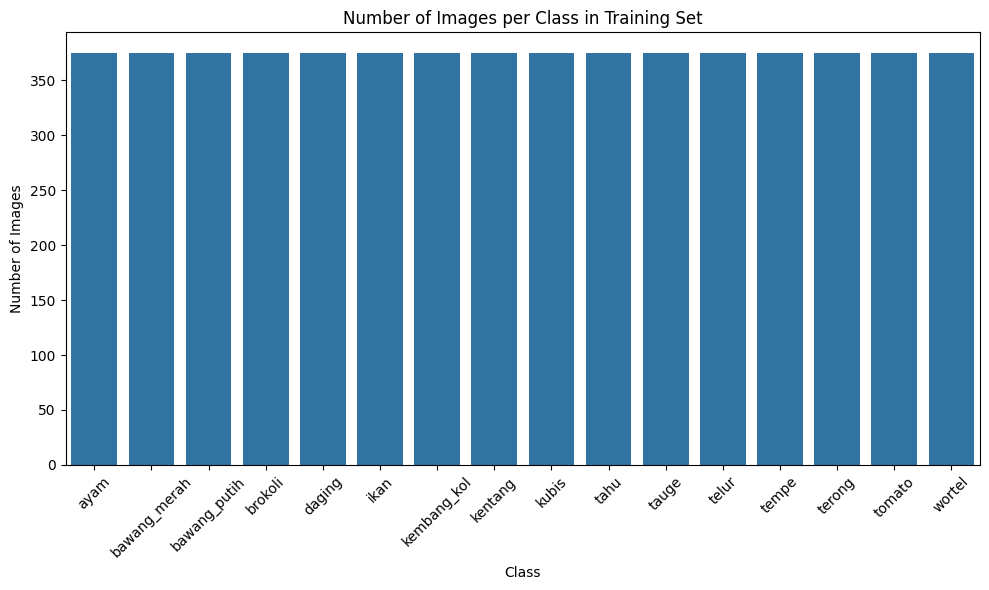

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=train_df)
plt.title('Number of Images per Class in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

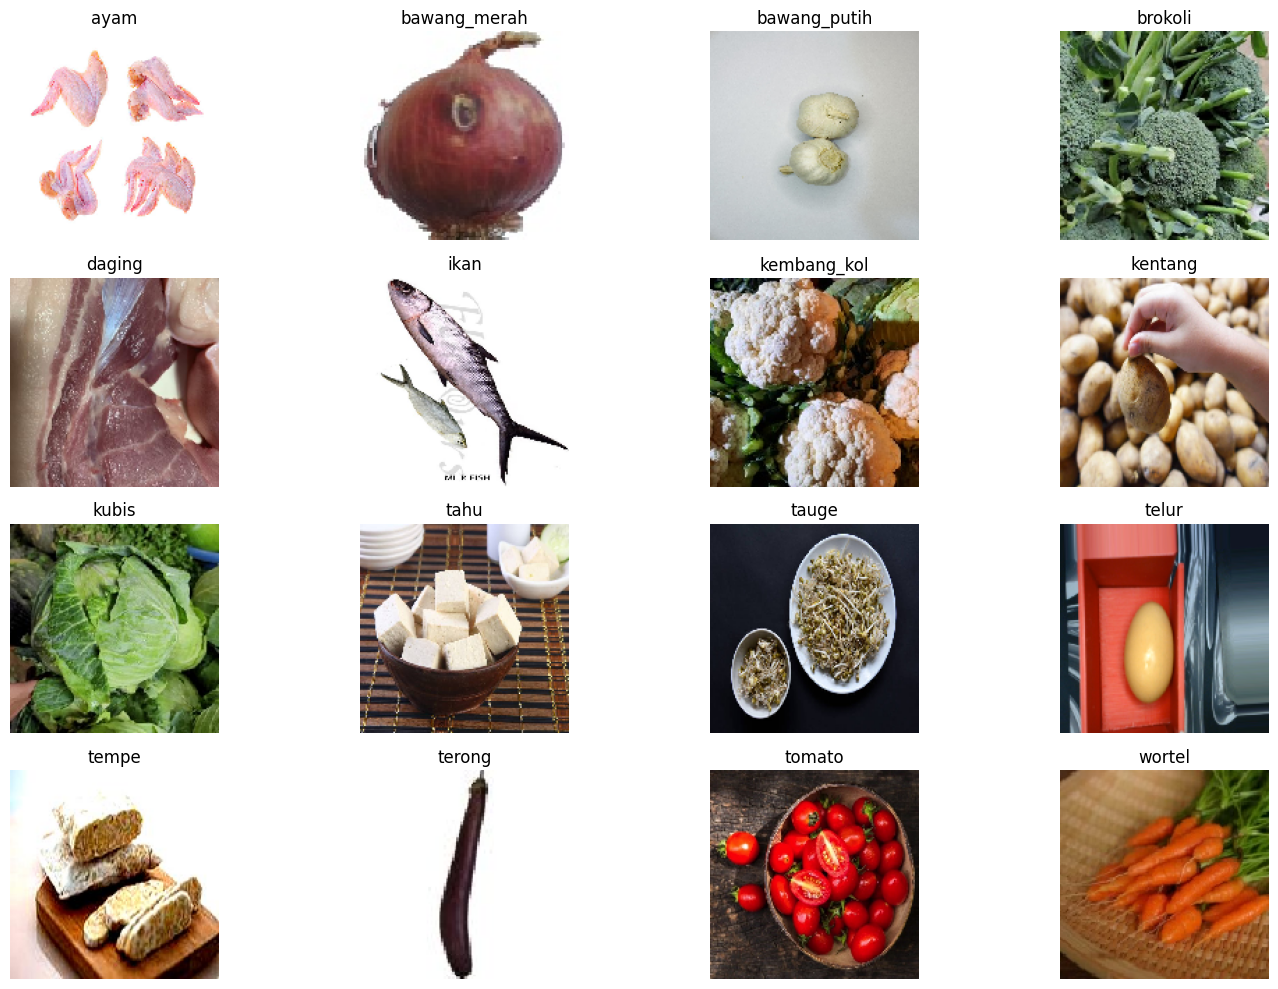

In [ ]:
def display_sample_images(base_dir, class_names):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        images = [f for f in os.listdir(class_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

        if images:
            img_file = random.choice(images)
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path, target_size=(150, 150))
            plt.subplot(4, 4, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()
display_sample_images(TRAIN_DIR, class_names)

## PREPROCESSING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.15,
    brightness_range=[0.85, 1.15],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 5994 images belonging to 16 classes.
Found 1199 images belonging to 16 classes.
Found 800 images belonging to 16 classes.


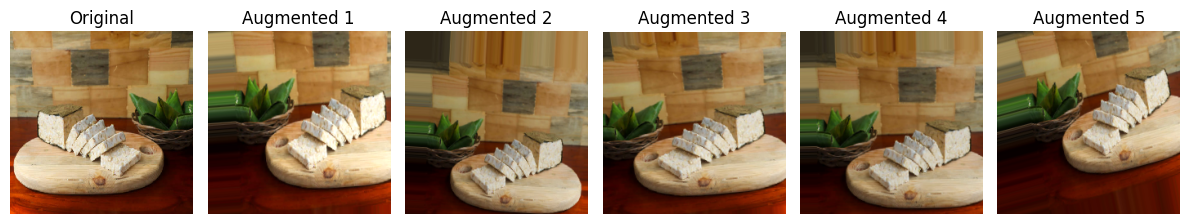

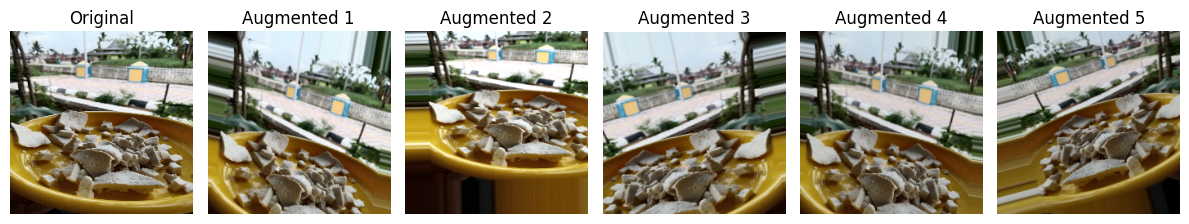

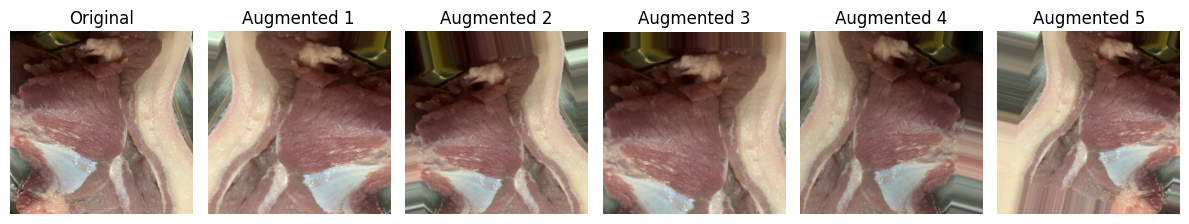

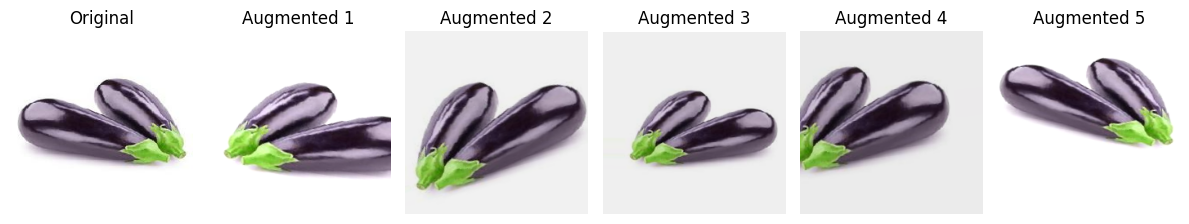

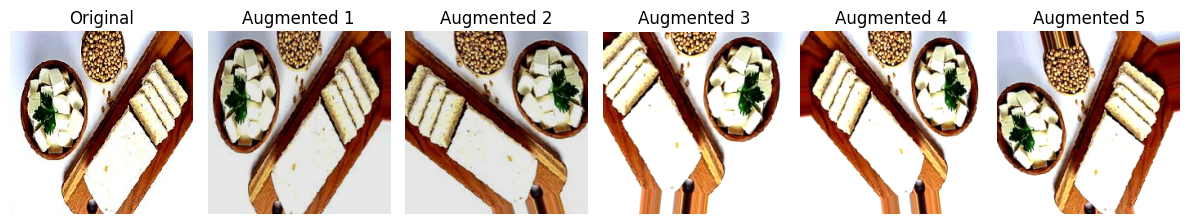

In [ ]:
def show_augmentation(original_img_path):
    img = load_img(original_img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 6, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    for i in range(5):
        augmented_img = train_datagen.random_transform(img_array[0])
        augmented_img = np.clip(augmented_img, 0, 255).astype('uint8')
        plt.subplot(1, 6, i + 2)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

for _ in range(5):
    random_class = random.choice(class_names)
    class_dir = os.path.join(TRAIN_DIR, random_class)
    images = [f for f in os.listdir(class_dir)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        img_file = random.choice(images)
        img_path = os.path.join(class_dir, img_file)
        show_augmentation(img_path)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, InputLayer, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

model = Sequential([
        InputLayer(shape=(IMG_SIZE, IMG_SIZE, 3)),

        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()
total_params = model.count_params()
print(f"Total Parameters: {total_params}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,240 (1.76 MB)

 Trainable params: 459,280 (1.75 MB)

 Non-trainable params: 960 (3.75 KB)

Total Parameters: 460240


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/models/testing.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2582 - loss: 2.9778
Epoch 1: val_accuracy did not improve from 0.12010
47/47 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.2603 - loss: 2.9710 - val_accuracy: 0.0626 - val_loss: 3.3270 - learning_rate: 1.0000e-04
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5085 - loss: 2.1823
Epoch 2: val_accuracy did not improve from 0.12010
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.5089 - loss: 2.1808 - val_accuracy: 0.0626 - val_loss: 3.3374 - learning_rate: 1.0000e-04
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5975 - loss: 1.9265
Epoch 3: val_accuracy did not improve from 0.12010
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.5977 - loss: 1.9258 - val_accuracy: 0.0642 - val_loss: 3.3728 - learning_rate: 1.0000e-04
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6300 - loss: 1.8108
Epoch 4: val_accuracy did not improve from 0.12010
47/47 ━━━━━━━━━━━━━━━━━━━━ 1

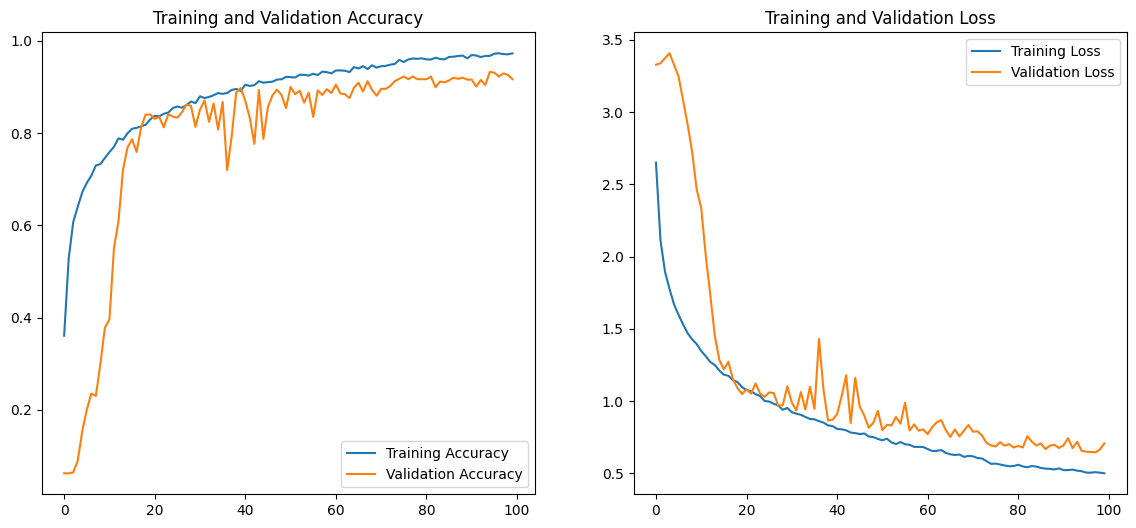

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9330 - loss: 0.6392


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9316 - loss: 0.6466
Validation Accuracy: 92.91%
Test Accuracy: 91.75%


In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
plot_training_history(history)

val_loss, val_accuracy = model.evaluate(val_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/MyDrive/models/testing.keras')
test_generator.reset()
preds = best_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 918ms/step
Classification Report:
              precision    recall  f1-score   support

        ayam       0.92      0.88      0.90        50
bawang_merah       1.00      1.00      1.00        50
bawang_putih       0.75      0.94      0.83        50
     brokoli       0.98      0.92      0.95        50
      daging       1.00      0.96      0.98        50
        ikan       0.77      0.88      0.82        50
 kembang_kol       1.00      0.88      0.94        50
     kentang       0.87      0.94      0.90        50
       kubis       0.98      0.96      0.97        50
        tahu       0.75      0.82      0.78        50
       tauge       1.00      0.84      0.91        50
       telur       0.96      0.88      0.92        50
       tempe       0.86      0.88      0.87        50
      terong       0.92      0.92      0.92        50
      tomato       0.94      0.94      0.94        50
      wortel       0.96      0.88      0.92        50

    accuracy      

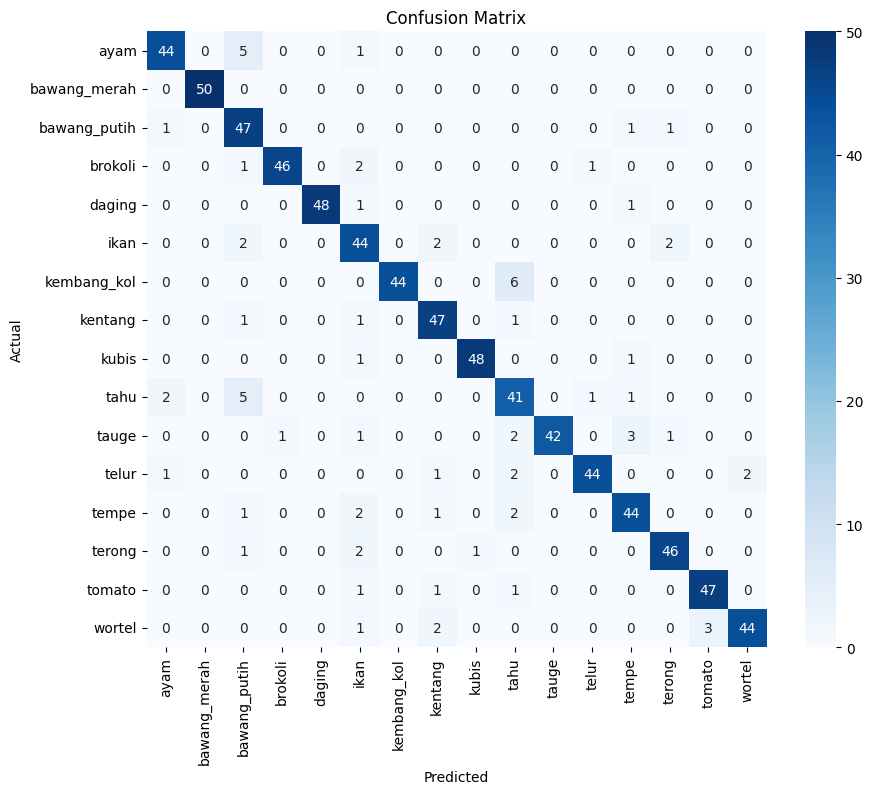

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
